# First Applications of Growth Chart Scraping

### MSP 10.16.2017

Use the hard-fought data from growth chart construction.

In [1]:
from IPython.display import HTML
HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.input').hide();} else { $('div.input').show(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
# boilerplate imports

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
%matplotlib inline

# imports for scraping

from bs4 import BeautifulSoup
import requests



In [3]:

f = open('data/gamelogs.dat')



DDStats = {}

for line in f:
    q = [d.strip(" ") for d in line.split(';')]
    
    if q[0] not in DDStats.keys():
        DDStats[q[0]] = {}
        
    if q[1] not in DDStats[q[0]].keys():
        DDStats[q[0]][q[1]] = np.zeros(len(q)-3)
        
    for indx in range(0,len(q)-3):
        DDStats[q[0]][q[1]][indx] = float(q[indx+2])
    


f.close()


print(DDStats.keys())

['PA', 'BB', 'HR', 'H', 'R', 'SO', 'RBI', 'SB']


#### Example Plot

Check out a player's stats in context.

956
214


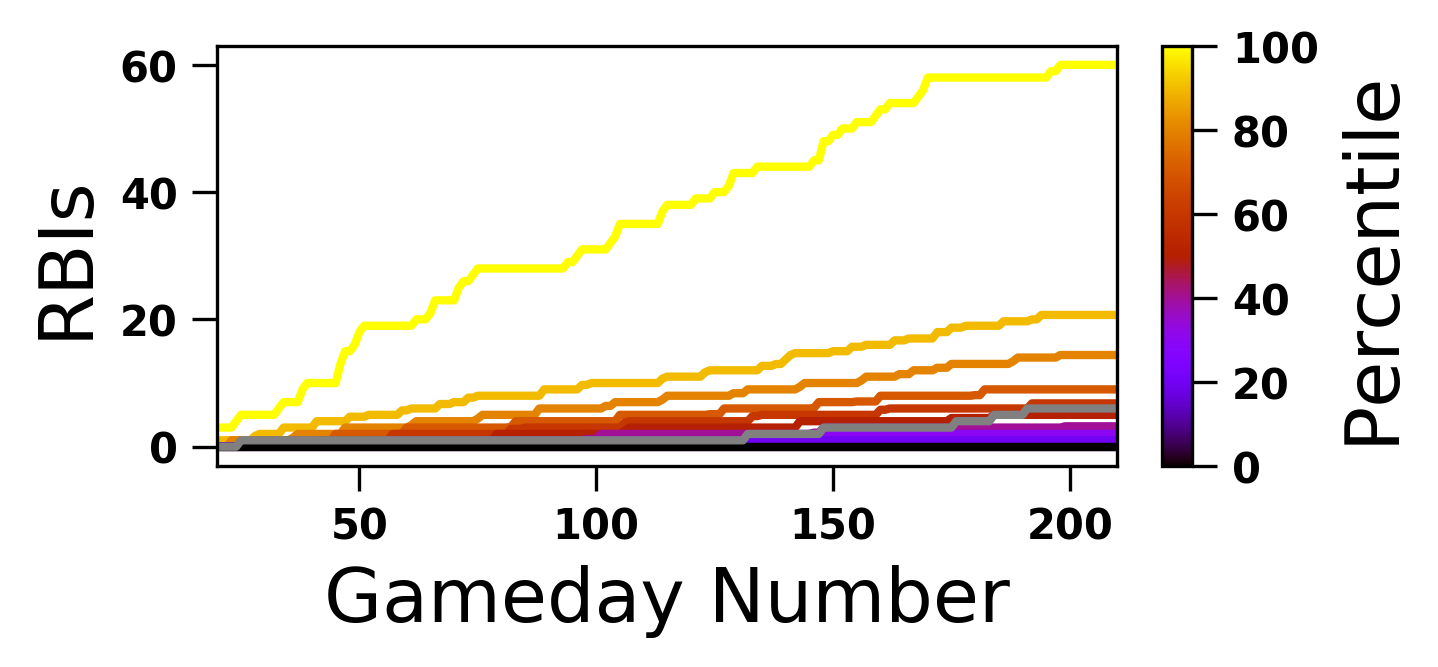

In [18]:
PAlist = np.zeros([len(np.array(DDStats['PA'].keys())),len(np.array(DDStats['PA']['Joey Votto']))])


stat = 'SB'
print(len(np.array(DDStats[stat].keys())) )

pa_thresh = []
pa_level = 400.

for indx,player in enumerate(DDStats[stat].keys()):
    PAlist[indx] = np.cumsum(DDStats[stat][player])
    if np.sum(DDStats['PA'][player]) > pa_level:
        pa_thresh.append(indx)

    
print len(pa_thresh)

fig = plt.figure(figsize=(5,2))
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
for perc in range(100,-10,-10):
    ax.plot(np.percentile(PAlist[pa_thresh],perc,axis=0),color=cm.gnuplot(float(perc/100.),1.))
    

   
avg_players = ['Jon Jay']
    
for x in avg_players:
    ax.plot(np.cumsum(DDStats[stat][x]),color='gray',lw=2.)

    
ax.set_ylabel('RBIs',size=18)
ax.set_xlabel('Gameday Number',size=18)
ax.set_xlim(20.,210.)
    
cmap = mpl.cm.gnuplot; norm = mpl.colors.Normalize(vmin=0, vmax=100)
cb1 = mpl.colorbar.ColorbarBase(ax2, cmap=cmap,norm=norm)
cb1.set_label('Percentile',size=18)





### Find the Average Players

In [7]:
np.random.choice(np.array(DDStats['SB']['Joey Votto']),10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

956
214
['Aaron Altherr' 'Avisail Garcia']
['Rougned Odor' 'Keon Broxton' 'Matt Joyce' 'J.T. Realmuto' 'A.J. Pollock'
 'Albert Pujols' 'Robbie Grossman' 'Edwin Encarnacion' 'Elvis Andrus'
 'Josh Reddick' 'Hernan Perez' 'Eugenio Suarez' 'Mike Trout' 'Tim Beckham'
 'Melky Cabrera' 'Miguel Cabrera' 'Logan Forsythe' 'J.D. Martinez'
 'Michael Taylor' 'Delino DeShields']
['Zack Cozart' 'Mike Zunino' 'Freddie Freeman' 'Cesar Hernandez']
['Aaron Altherr' 'Avisail Garcia']
['Freddie Freeman']
['Tucker Barnhart' 'Tommy Joseph' 'Jose Reyes' 'Logan Morrison'
 'Curtis Granderson' 'Willson Contreras' 'Carlos Beltran' 'Kevin Kiermaier'
 'Brandon Phillips' 'Giancarlo Stanton' 'Chris Taylor' 'Jose Peraza'
 'Austin Hedges' 'Buster Posey' 'Martin Maldonado' 'Yangervis Solarte'
 'Jackie Bradley Jr.' 'Hunter Pence']
['Willson Contreras' 'Carlos Beltran' 'Kevin Kiermaier' 'Brandon Phillips']
['Freddy Galvis' 'Tucker Barnhart' 'Tommy Joseph']
['Aaron Altherr']
['Aaron Altherr' 'Avisail Garcia' 'Nolan Arenado

IndexError: index 214 is out of bounds for axis 0 with size 214

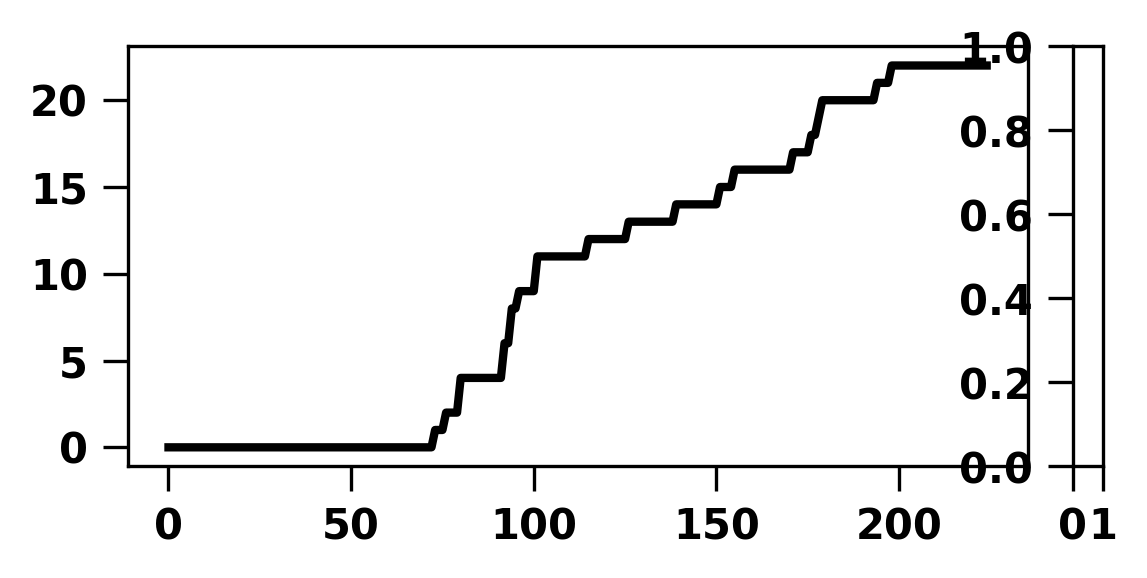

In [37]:
PAlist = np.zeros([len(np.array(DDStats['PA'].keys())),len(np.array(DDStats['PA']['Joey Votto']))])


stat = 'SB'
print(len(np.array(DDStats[stat].keys())) )

pa_thresh = []
pa_level = 400.

for indx,player in enumerate(DDStats[stat].keys()):
    PAlist[indx] = np.cumsum(DDStats[stat][player])
    if np.sum(DDStats['PA'][player]) > pa_level:
        pa_thresh.append(indx)

    
print len(pa_thresh)


fifty_line = np.percentile(PAlist[pa_thresh],perc,axis=0)

fig = plt.figure(figsize=(5,2))
ax = fig.add_axes([0.18,0.22,0.6,0.7])
ax2 = fig.add_axes([0.81,0.22,0.02,0.7])

    
    
ax.plot(fifty_line,color='black')

nonzero = np.where(fifty_line > 0.)[0]

for indx,val in enumerate(fifty_line[nonzero]):
    sat_player = np.where(np.abs(PAlist[pa_thresh][nonzero[indx]] - val) == np.min(np.abs(PAlist[pa_thresh][nonzero[indx]] - val)))[0]
    print (np.array(DDStats[stat].keys())[pa_thresh])[sat_player]


Mr. Average Runs is Ryon Healy!

In [9]:



def read_batting_data(infile):
    BatData = np.genfromtxt(infile,\
                  dtype={'names': ("Name","Team","G","AB","PA","H",\
                                   "1B","2B","3B","HR","R","RBI","BB","IBB",
                                   "SO","HBP","SF","SH","GDP","SB","CS","AVG","playerid"),\
                         'formats': ('S20','S20','i2','f4','f4','f4',\
                                     'f4','f4','f4','f4','f4','f4','f4','f4',\
                                    'f4','f4','f4','f4','f4','f4','f4','f4','i2')},\
                 skip_header=1,delimiter=',')
    return BatData

BD = read_batting_data('data/total_stats_040918.csv')


In [14]:
playername = 'Joey Votto'


print(BD['G'][plr])

#np.random.choice(np.array(DDStats['SB']['Joey Votto']),10)

[8]


In [26]:

sbs = np.zeros(len(BD['Name']))
realsbs = np.zeros(len(BD['Name']))
name = np.empty(len(BD['Name']),dtype='S20')

samples = 1000

for index,playername in enumerate(BD['Name']):
    
    #BD['G'][plr]
    name[index] = playername
    realsbs[index] = BD['SB'][index]
    
    try:
        tmp = 0
        
        for snum in range(samples):
            tmp += np.sum(np.random.choice(np.array(DDStats['SB'][playername][20:210]),BD['G'][index]))

        sbs[index] = tmp/float(samples)
        
    except:
        print('Not avail:',playername)
        sbs[index] = np.nan

('Not avail:', 'Preston Tucker')
('Not avail:', 'Nicholas Castellanos')
('Not avail:', 'Matt Duffy')
('Not avail:', 'Scott Kingery')
('Not avail:', 'Michael A. Taylor')
('Not avail:', 'Enrique Hernandez')


In [39]:
evals = np.round((realsbs-sbs)/sbs,1)
evalssorted = (-1.*evals).argsort()


for iplr in range(0,len(evals)):
    print '%20s %5.2f %2i'%(name[evalssorted[iplr]],evals[evalssorted[iplr]],realsbs[evalssorted[iplr]])

       Ryan Flaherty   inf  2
   Anthony Santander   inf  1
          Matt Olson   inf  1
        Tyler Austin   inf  1
      Hanley Ramirez 56.10  2
           Jay Bruce 26.80  1
        Rhys Hoskins 21.20  2
      Didi Gregorius 12.10  2
       Carlos Correa 10.20  1
     Addison Russell 10.10  1
      Josh Donaldson  9.90  1
        Hunter Pence  9.90  1
     Alcides Escobar  8.20  1
        Brandon Belt  7.90  1
        Miguel Rojas  7.60  1
        Tim Anderson  7.30  5
      Dansby Swanson  6.00  1
     Carlos Gonzalez  5.70  1
       Eddie Rosario  5.50  2
            Ian Happ  5.50  2
       Nolan Arenado  5.40  1
        Todd Frazier  5.20  1
     Corey Dickerson  4.90  1
       Aaron Altherr  4.30  1
      Carlos Santana  3.90  1
        Bryce Harper  3.80  1
             Jon Jay  3.60  1
         Jose Pirela  3.40  1
       Evan Longoria  3.30  1
        Buster Posey  3.00  1
        Kole Calhoun  2.90  1
    Francisco Lindor  2.90  3
      Odubel Herrera  2.90  1
       Jos